# The main implementation of thesis project

# Setting up GPU on macOS

## Installing OpenCL backed keras backend

$ pip3 install pyopencl

$ pip3 install plaidml

$ pip3 install plaidml-keras

$ pip3 install plaidbench 

$ plaidml-setup 

$ plaidbench keras mobilenet

In [23]:
!which pip3

/usr/local/anaconda3/bin/pip3


In [1]:
#!pip3 install pyopencl

In [2]:
#!pip3 install plaidml

In [3]:
#!pip3 install plaidml-keras

In [4]:
#!pip3 install plaidbench

## Setting keras GPU environment on macOS

In [1]:
#export KERAS_BACKEND="plaidml.keras.backend"
#export RUNFILES_DIR=/usr/local/share/plaidml 
#export PLAIDML_NATIVE_PATH=/usr/local/lib/libplaidml.dylib  

import os

os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"

os.environ["RUNFILES_DIR"] = "/usr/local/share/plaidml"
os.environ["RUNFILES_DIR"] = ""

#os.environ["PLAIDML_NATIVE_PATH"] = "/usr/local/lib/libplaidml.dylib"
os.environ["PLAIDML_NATIVE_PATH"] = "/usr/local/anaconda3/lib/libplaidml.dylib"

os.environ["PLAIDML_EXPERIMENTAL"] = "1"
os.environ["PLAIDML_DEVICE_IDS"] = "opencl_intel_iris(tm)_plus_graphics_645.0"

In [3]:
import keras

Using plaidml.keras.backend backend.


AttributeError: module 'keras.utils.generic_utils' has no attribute 'populate_dict_with_module_objects'

In [7]:
#!echo "y\n2\ny"|plaidml-setup

## Benchmarking GPU

In [13]:
!export KERAS_BACKEND="plaidml.keras.backend"

In [14]:
!export RUNFILES_DIR=/usr/local/share/plaidml

In [15]:
!export PLAIDML_NATIVE_PATH=/usr/local/lib/libplaidml.dylib

In [8]:
!plaidbench keras mobilenet

Traceback (most recent call last):
  File "/usr/local/anaconda3/bin/plaidbench", line 8, in <module>
    sys.exit(plaidbench())
  File "/usr/local/anaconda3/lib/python3.8/site-packages/click/core.py", line 829, in __call__
    return self.main(*args, **kwargs)
  File "/usr/local/anaconda3/lib/python3.8/site-packages/click/core.py", line 782, in main
    rv = self.invoke(ctx)
  File "/usr/local/anaconda3/lib/python3.8/site-packages/click/core.py", line 1259, in invoke
    return _process_result(sub_ctx.command.invoke(sub_ctx))
  File "/usr/local/anaconda3/lib/python3.8/site-packages/click/core.py", line 1066, in invoke
    return ctx.invoke(self.callback, **ctx.params)
  File "/usr/local/anaconda3/lib/python3.8/site-packages/click/core.py", line 610, in invoke
    return callback(*args, **kwargs)
  File "/usr/local/anaconda3/lib/python3.8/site-packages/click/decorators.py", line 21, in new_func
    return f(get_current_context(), *args, **kwargs)
  File "/usr/local/anaconda3/lib/python3

## Verifying if GPU works

In [19]:
# Don't use tensorflow.keras anywhere, instead use keras
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
batch_size = 128
num_classes = 10
epochs = 12
# input image dimensions
img_rows, img_cols = 28, 28
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Using plaidml.keras.backend backend.


AttributeError: module 'keras.utils.generic_utils' has no attribute 'populate_dict_with_module_objects'

# Setting customised library path

In [21]:
import numpy as np
import pandas as pd
import os
import sys 

libpath = "lib"
sys.path.append(libpath)

In [22]:
sys.version

'3.8.8 (default, Apr 13 2021, 12:59:45) \n[Clang 10.0.0 ]'

# Configuration

In [2]:
image_size = (128, 128)
n_image_channels = 3

image_shape = (*image_size, n_image_channels) #input image shape

proj_dense_dims = (400, 200, ) #the projection head dense dims

batch_size = 128 # sample batch size

n_epochs = 20

temperature = 0.1

# Stronger augmentations for contrastive, weaker ones for supervised training

# self-supervised contrastive learning
contrastive_imgaug_params = {"min_area": 0.25, "brightness": 0.6, "jitter": 0.2}

# for classification
classification_imgaug_params = {"min_area": 0.75, "brightness": 0.3, "jitter": 0.1}

# Preparing the dataset

In [3]:
import tensorflow as tf
from tensorflow import keras

In [4]:
train_dataset_ = keras.preprocessing.image_dataset_from_directory(
                "datasets_new/Multiband_Brodatz_Texture/train", 
                image_size = image_size, 
                #subset = "training",
                #validation_split = 0.2,
                batch_size = batch_size,
                interpolation = "bilinear",
                color_mode = "rgb",
                #seed = 2771,
                shuffle = True
                )

Found 30800 files belonging to 154 classes.


In [5]:
test_dataset_ = keras.preprocessing.image_dataset_from_directory(
                "datasets_new/Multiband_Brodatz_Texture/test", 
                image_size = image_size, 
                #subset="validation",
                #validation_split = 0.2,
                batch_size = batch_size,
                interpolation = "bilinear",
                color_mode = "rgb",
                #seed = 2771,
                shuffle = True
                )

Found 7700 files belonging to 154 classes.


In [6]:
n_classes = len(train_dataset_.class_names)
n_samples = len(train_dataset_) * batch_size
n_batches = len(train_dataset_)

print("n_classes = ", n_classes)
print("n_samples = ", n_samples)
print("n_batches = ", n_batches)

n_classes =  154
n_samples =  30848
n_batches =  241


In [7]:
train_dataset = train_dataset_.map(lambda x, y: (x / 255., y))
train_dataset = train_dataset.prefetch(buffer_size = tf.data.AUTOTUNE)

test_dataset = test_dataset_.map(lambda x, y: (x / 255., y))
test_dataset = test_dataset.prefetch(buffer_size = tf.data.AUTOTUNE)

In [8]:
x1 = next(iter(train_dataset))
x2 = x1[0]
x2.shape

TensorShape([128, 128, 128, 3])

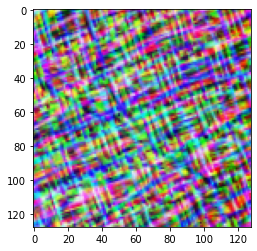

In [9]:
import matplotlib.pyplot as plt

img = next(iter(train_dataset))[0][0]

plt.imshow(img, vmin=0, vmax=1)
plt.show()

In [10]:
#import matplotlib.pyplot as plt
#import tensorflow as tf
#import tensorflow_datasets as tfds

#from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

In [11]:
# Dataset hyperparameters
#unlabeled_dataset_size = 100000
#labeled_dataset_size = 5000
#image_size = 128
#image_channels = 3

# Algorithm hyperparameters
#num_epochs = 20
#batch_size = 525  # Corresponds to 200 steps per epoch
#width = 128
#temperature = 0.1
#n_classes = 154

# Stronger augmentations for contrastive, weaker ones for supervised training
#contrastive_augmentation = {"min_area": 0.25, "brightness": 0.6, "jitter": 0.2}
#classification_augmentation = {"min_area": 0.75, "brightness": 0.3, "jitter": 0.1}

In [12]:

# Distorts the color distibutions of images
class CustomisedColorAffineLayer(layers.Layer):
    def __init__(self, brightness=0, jitter=0, **kwargs):
        super().__init__(**kwargs)

        self.brightness = brightness
        self.jitter = jitter

    def call(self, images, training=True):
        if training:
            batch_size = tf.shape(images)[0]

            # Same for all colors
            brightness_scales = 1 + tf.random.uniform(
                (batch_size, 1, 1, 1), minval=-self.brightness, maxval=self.brightness
            )
            # Different for all colors
            jitter_matrices = tf.random.uniform(
                (batch_size, 1, 3, 3), minval=-self.jitter, maxval=self.jitter
            )

            color_transforms = (
                tf.eye(3, batch_shape=[batch_size, 1]) * brightness_scales
                + jitter_matrices
            )
            images = tf.clip_by_value(tf.matmul(images, color_transforms), 0, 1)
        return images




In [13]:

# Image augmentation module
def build_augmenter(min_area, brightness, jitter):
    zoom_factor = 1.0 - tf.sqrt(min_area)
    return keras.Sequential(
        [
            #keras.layers.InputLayer(input_shape=(image_size, image_size, image_channels)),
            keras.layers.InputLayer(input_shape=image_shape),
            #preprocessing.Rescaling(1 / 255),
            preprocessing.RandomFlip("horizontal"),
            preprocessing.RandomTranslation(zoom_factor / 2, zoom_factor / 2),
            preprocessing.RandomZoom((-zoom_factor, 0.0), (-zoom_factor, 0.0)),
            CustomisedColorAffineLayer(brightness, jitter),
        ]
    )


def visualize_augmentations(n_samples):
    # Sample a batch from a dataset
    #images = next(iter(train_dataset))[0][0][:num_images]
        
    images = next(iter(train_dataset))[0][:n_samples]
    
    #print(images.shape)
    #a=get_augmenter(**contrastive_augmentation)(images)
    
    #print(a.shape)
    
    
    # Apply augmentations
    augmented_images = zip(
        images,
        build_augmenter(**classification_imgaug_params)(images),
        build_augmenter(**contrastive_imgaug_params)(images),
        build_augmenter(**contrastive_imgaug_params)(images),
    )
    
    #print(augmented_images.shape)
    
    #return

    row_titles = [
        "Original:",
        "Weakly augmented:",
        "Strongly augmented:",
        "Strongly augmented:",
    ]
    
    plt.figure(figsize=(n_samples * 2.2, 4 * 2.2), dpi = 100)
    
    for column, image_row in enumerate(augmented_images):
        for row, image in enumerate(image_row):
            plt.subplot(4, n_samples, row * n_samples + column + 1)
            plt.imshow(image, vmin=0, vmax=1)
            if column == 0:
                plt.title(row_titles[row], loc="left")
            plt.axis("off")
    plt.tight_layout()


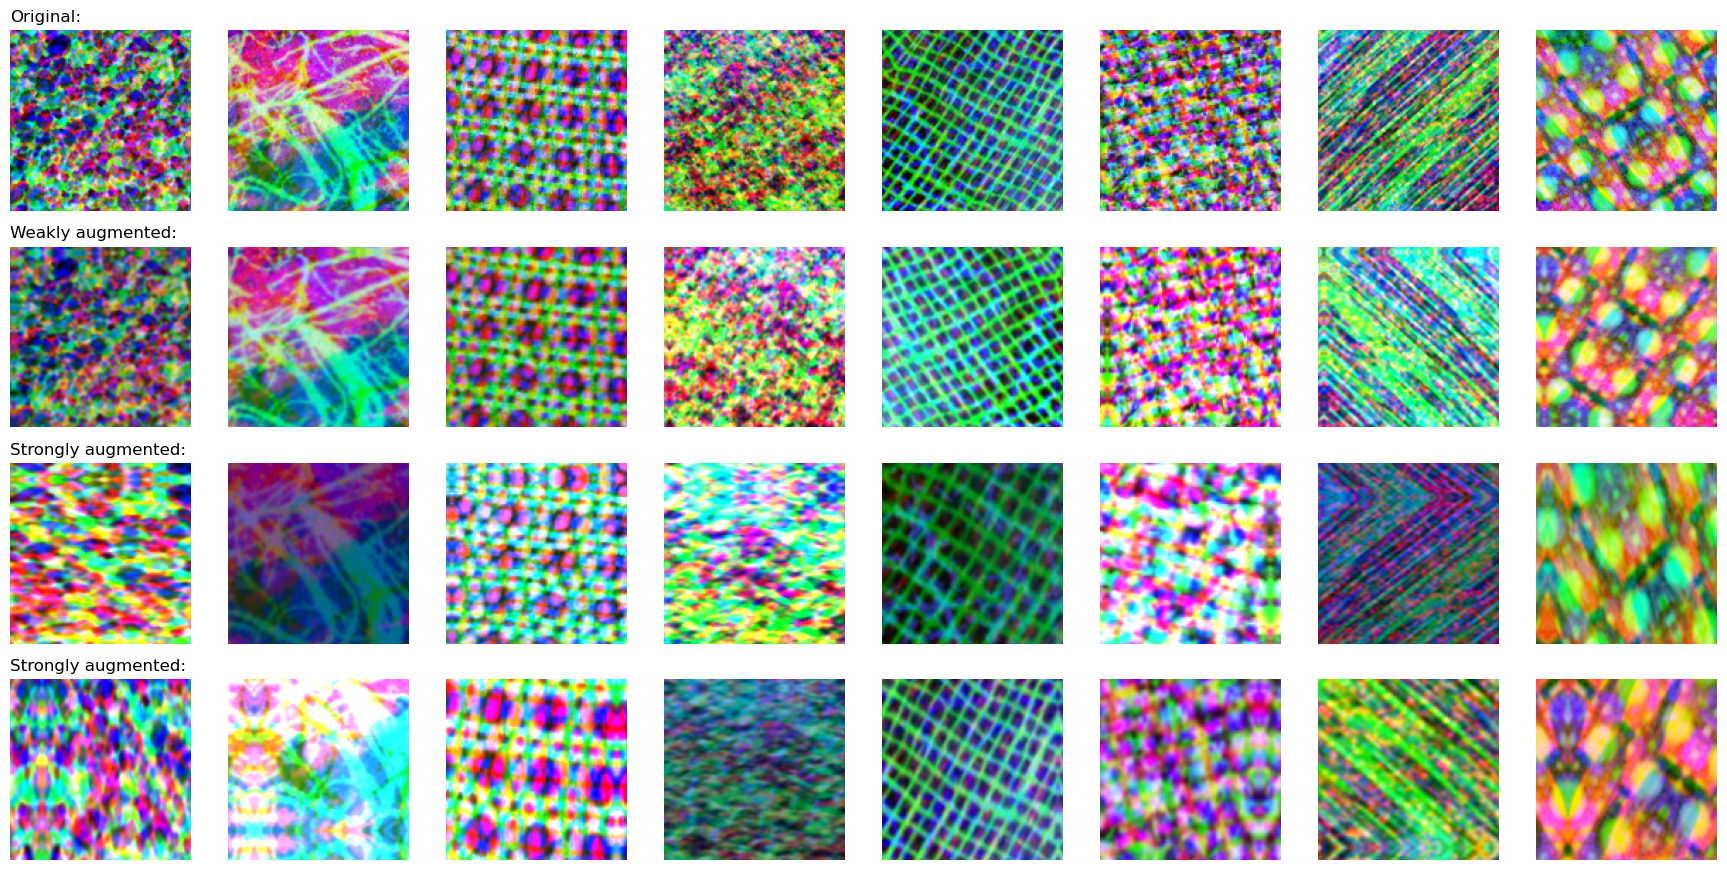

In [14]:
visualize_augmentations(n_samples = 8)

# Simple base encoder

In [38]:
# Define the encoder architecture
def build_simple_encoder():
    return keras.Sequential(
        [
            keras.layers.InputLayer(input_shape=image_shape),
            
            layers.Conv2D(32, kernel_size=5, strides=2, activation="relu"),
            layers.Conv2D(64, kernel_size=5, strides=2, activation="relu"),
            layers.BatchNormalization(),
            layers.Dropout(0.5),
            
            layers.Conv2D(128, kernel_size=5, strides=2, activation="relu"),            
            layers.Conv2D(256, kernel_size=5, strides=2, activation="relu"), 
            layers.BatchNormalization(),
            layers.Dropout(0.3),
            
            layers.Flatten(),
            #layers.BatchNormalization(),
            #layers.Dropout(0.6),
            
            layers.Dense(512, activation="relu"),
        ],
        name="encoder_simple",
    )

# Baseline: Supervised learning with simple encoder

In [93]:
# Baseline supervised training with random initialization
baseline_model_simple = keras.Sequential(
    [
        keras.layers.InputLayer(input_shape = image_shape),
        build_augmenter(**classification_imgaug_params),
        build_simple_encoder(),
        layers.Dense(n_classes),
    ],
    name="baseline_model_simple",
)

baseline_model_simple.compile(
        optimizer = keras.optimizers.Adam(),
        loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics = [keras.metrics.SparseCategoricalAccuracy(name="acc")],
    )

In [94]:
#baseline_model_simple.summary()

In [95]:
images = next(iter(train_dataset))[0]
out = baseline_model_simple.predict(images)
out.shape

(128, 154)

In [96]:
#labels = next(iter(train_dataset))[1]
#labels

In [97]:
#baseline_model_simple.layers[0].output

In [98]:
#baseline_model_simple.layers[-1].output

In [99]:
baseline_simple_history = baseline_model_simple.fit(
                    train_dataset, 
                    epochs = n_epochs,
                    #steps_per_epoch = 100,
                    validation_data = test_dataset,
                    verbose = 1
                   )

Epoch 1/20
241/241 [==============================] - 222s 916ms/step - loss: 3.5922 - acc: 0.1816 - val_loss: 25.4525 - val_acc: 0.0065
Epoch 2/20
241/241 [==============================] - 187s 775ms/step - loss: 0.9584 - acc: 0.6928 - val_loss: 9.4737 - val_acc: 0.1023
Epoch 3/20
241/241 [==============================] - 189s 783ms/step - loss: 0.4569 - acc: 0.8470 - val_loss: 2.8901 - val_acc: 0.4421
Epoch 4/20
241/241 [==============================] - 183s 756ms/step - loss: 0.3210 - acc: 0.8923 - val_loss: 2.1376 - val_acc: 0.5784
Epoch 5/20
241/241 [==============================] - 177s 733ms/step - loss: 0.2650 - acc: 0.9110 - val_loss: 2.7581 - val_acc: 0.5295
Epoch 6/20
241/241 [==============================] - 176s 728ms/step - loss: 0.2213 - acc: 0.9244 - val_loss: 3.9347 - val_acc: 0.4308
Epoch 7/20
241/241 [==============================] - 176s 727ms/step - loss: 0.1835 - acc: 0.9375 - val_loss: 2.4266 - val_acc: 0.6006
Epoch 8/20
241/241 [===========================

In [100]:
max_val_acc = max(baseline_simple_history.history["val_acc"]) * 100
max_train_acc = max(baseline_simple_history.history["acc"]) * 100

print(f"Maximal train accuracy: {max_train_acc:.2f}%")
print(f"Maximal validation accuracy: {max_val_acc:.2f}%")

Maximal train accuracy: 97.64%
Maximal validation accuracy: 78.05%


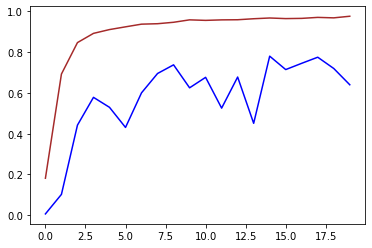

In [105]:
val_accs = baseline_simple_history.history["val_acc"]
train_accs = baseline_simple_history.history["acc"]

plt.plot(val_accs, c = "blue")
plt.plot(train_accs, c = "brown")

plt.show()

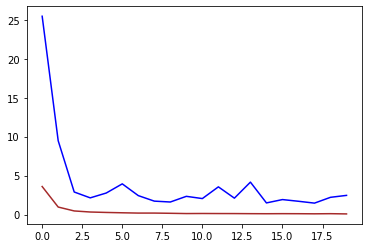

In [106]:
val_loss = baseline_simple_history.history["val_loss"]
train_loss = baseline_simple_history.history["loss"]

plt.plot(val_loss, c = "blue")
plt.plot(train_loss, c = "brown")

plt.show()

# Customised keras k-NN metric

In [ ]:
class CustomisedKNNMetric(keras.metrics.Metric):
    
    
    
    def __init__(self, **kwargs):
        super(CustomisedKNNMetric, self).__init__(**kwargs) 
        
        #self.total_cm = self.add_weight("total", shape=(num_classes,num_classes), initializer="zeros")
        
    def reset_states(self):
        for s in self.variables:
            s.assign(tf.zeros(shape = s.shape))
            
    def update_state(self, y_true, y_pred, sample_weight=None):
        self.total_cm.assign_add(self.confusion_matrix(y_true,y_pred))
        return self.total_cm
        
    def result(self):
        return self.process_confusion_matrix()
    
    def confusion_matrix(self,y_true, y_pred):
        """
        Make a confusion matrix
        """
        y_pred=tf.argmax(y_pred,1)
        cm=tf.math.confusion_matrix(y_true,y_pred,dtype=tf.float32,num_classes=self.num_classes)
        return cm
    
    def process_confusion_matrix(self):
        "returns precision, recall and f1 along with overall accuracy"
        cm=self.total_cm
        diag_part=tf.linalg.diag_part(cm)
        precision=diag_part/(tf.reduce_sum(cm,0)+tf.constant(1e-15))
        recall=diag_part/(tf.reduce_sum(cm,1)+tf.constant(1e-15))
        f1=2*precision*recall/(precision+recall+tf.constant(1e-15))
        return precision,recall,f1
    
    def fill_output(self,output):
        results=self.result()
        for i in range(self.num_classes):
            output['precision_{}'.format(i)]=results[0][i]
            output['recall_{}'.format(i)]=results[1][i]
            output['F1_{}'.format(i)]=results[2][i]

# Contrastive learning with simple encoder

In [44]:

class ContrastiveModel(keras.Model):
    def __init__(self, 
                 *, 
                 temperature = 0.1,
                 encoder,
                 train_encoder = True,
                 #proj_dims = (500, 300), 
                 #imgaug,
                 #prob_imgaug,
                 ):
        
        super().__init__()

        self.temperature = temperature
        self.contrastive_augmenter = build_augmenter(**contrastive_imgaug_params)
        self.classification_augmenter = build_augmenter(**classification_imgaug_params)
        #self.encoder = build_simple_encoder()
        self.encoder = encoder
        self.train_encoder = train_encoder
        
        proj_input_shape = self.encoder.layers[-1].output.shape[1]
        print("proj_input_shape = ", proj_input_shape)
        
        # Non-linear MLP as projection head
        self.projection_head = keras.Sequential(
            [
                keras.layers.InputLayer(input_shape=(proj_input_shape, )),
                layers.Dense(512, activation="relu"),
                layers.Dense(512), #pure linear
                #layers.BatchNormalization()
            ],
            name="projection_head",
        )
        
        # Single dense layer for linear probing
        self.linear_probe = keras.Sequential(
            [
                 layers.InputLayer(input_shape=(512,)), 
                 layers.Dense(n_classes), #pure linear
            ], 
                 name="linear_probe"
        )

        #self.encoder.summary()
        #self.projection_head.summary()
        #self.linear_probe.summary()

    def compile(self, contrastive_optimizer, probe_optimizer, **kwargs):
        super().compile(**kwargs)

        self.contrastive_optimizer = contrastive_optimizer
        self.probe_optimizer = probe_optimizer

        # self.contrastive_loss will be defined as a method
        self.probe_loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)

        self.contrastive_loss_tracker = keras.metrics.Mean(name="c_loss")
        self.contrastive_accuracy = keras.metrics.SparseCategoricalAccuracy(
            name="c_acc"
        )
        self.probe_loss_tracker = keras.metrics.Mean(name="p_loss")
        self.probe_accuracy = keras.metrics.SparseCategoricalAccuracy(name="p_acc")

        self.knn_accuracy = keras.metrics.BinaryAccuracy(name="k_acc", threshold=0.5)
        
    @property
    def metrics(self):
        return [
            self.contrastive_loss_tracker, #contrastive loss
            self.contrastive_accuracy, #contrastive accuracy
            self.probe_loss_tracker, #linear prober loss
            self.probe_accuracy, #linear prober accuracy
            #self.knn_accuracy #kNN accuracy
        ]

    def contrastive_loss(self, projections_1, projections_2):
        # InfoNCE loss (information noise-contrastive estimation)
        # NT-Xent loss (normalized temperature-scaled cross entropy)

        
        # Cosine similarity: the dot product of the l2-normalized feature vectors
        projections_1 = tf.math.l2_normalize(projections_1, axis=1)
        projections_2 = tf.math.l2_normalize(projections_2, axis=1)
        
        similarities = (
            tf.matmul(projections_1, projections_2, transpose_b=True) / self.temperature
        )

        # The similarity between the representations of two augmented views of the
        # same image should be higher than their similarity with other views
        batch_size = tf.shape(projections_1)[0]
        
        fake_labels = tf.range(batch_size)
                
        self.contrastive_accuracy.update_state(fake_labels, similarities)
        self.contrastive_accuracy.update_state(fake_labels, tf.transpose(similarities))

        # The temperature-scaled similarities are used as logits for cross-entropy
        # a symmetrized version of the loss is used here
        loss_1_2 = keras.losses.sparse_categorical_crossentropy(
            fake_labels, similarities, from_logits=True
        )
        
        loss_2_1 = keras.losses.sparse_categorical_crossentropy(
            fake_labels, tf.transpose(similarities), from_logits=True
        )
        return (loss_1_2 + loss_2_1) / 2

    def train_step(self, data):
     
        #unpacking the training images and labels (fake) in the batch
        images,labels = data
    
        
        """ The contrastive learning episode
        
        """
        
        # We randomly sample two transformation functions
        # and use them to augment the input batch (N images).
        augmented_images_1 = self.contrastive_augmenter(images)
        augmented_images_2 = self.contrastive_augmenter(images)
        
        
        # We now have 2*N augmented images
        
        
        # tf.GradientTape is a basic facility in tensorflow, which implemented 
        # of recording operations for automatic differentiation..
        #
        # ref: https://www.tensorflow.org/api_docs/python/tf/GradientTape
        # ref:
        
        # Create a GradientTape instance to record the forward process
        with tf.GradientTape() as tape:
            # Feeding augmented images (2*N) into the base encoder
            # to extract their features (2*N)
            features_1 = self.encoder(augmented_images_1)
            features_2 = self.encoder(augmented_images_2)
            
            # Feeding the features (2*N) into the projection head, which is 
            # a MLP, the final layer is a pure linear layer.
            projections_1 = self.projection_head(features_1)
            projections_2 = self.projection_head(features_2)
            
            # We now have 2*N projections from the projection head
            # and compute the contrastive loss (info-NCE)
            contrastive_loss = self.contrastive_loss(projections_1, projections_2)
            
        # Computing the gradients w.r.t. every trainable variables by back-propogating the errors    
        # the *gradients* has the results with the form dL / dW
        
        if self.train_encoder:
            gradients = tape.gradient(
                contrastive_loss,
                self.encoder.trainable_weights + self.projection_head.trainable_weights,
            )
        
            # Optimising the weights by the computed gradients.
            self.contrastive_optimizer.apply_gradients(
                zip(
                    gradients,
                    self.encoder.trainable_weights + self.projection_head.trainable_weights,
                )
            )
        else:
            gradients = tape.gradient(
                contrastive_loss,
                self.projection_head.trainable_weights,
            )
        
            # Optimising the weights by the computed gradients.
            self.contrastive_optimizer.apply_gradients(
                zip(
                    gradients,
                    self.projection_head.trainable_weights,
                )
            )
            
        # Updating the loss history.
        self.contrastive_loss_tracker.update_state(contrastive_loss)

        
        """ Updating the weights of the linear prediction model
        
        """
                        
        augmented_images_3 = self.classification_augmenter(images)
        
        # Forward
        with tf.GradientTape() as tape:
            
            features = self.encoder(augmented_images_3)
            
            features_2 = self.projection_head(features)
                      
            class_logits = self.linear_probe(features_2)
            
            probe_loss = self.probe_loss(labels, class_logits)
            
            
        # backwards, computing the gradients w.r.t. the linear prober
        gradients = tape.gradient(probe_loss, self.linear_probe.trainable_weights)
        
        # updating the weights.
        self.probe_optimizer.apply_gradients(
            zip(gradients, self.linear_probe.trainable_weights)
        )
        
        # updating history.
        self.probe_loss_tracker.update_state(probe_loss)
        self.probe_accuracy.update_state(labels, class_logits)
        
        
        return {m.name: m.result() for m in self.metrics}

    def test_step(self, data):
        
        images, labels = data

        augmented_images = self.classification_augmenter(images, training=False)
        
        features = self.encoder(augmented_images, training=False)
        features_2 = self.projection_head(features, training=False)
        
        class_logits = self.linear_probe(features_2, training=False)
        probe_loss = self.probe_loss(labels, class_logits)
        
        self.probe_loss_tracker.update_state(probe_loss)
        self.probe_accuracy.update_state(labels, class_logits)

        
        # knn accuracy
        
        return {m.name: m.result() for m in self.metrics[2:]}


In [45]:
contrastive_encoder_simple = build_simple_encoder()

contrastive_model_simple = ContrastiveModel(   temperature = 0.1,
                                               encoder = contrastive_encoder_simple,
                                               train_encoder = True)

contrastive_model_simple.compile(
            contrastive_optimizer = keras.optimizers.Adam(),
            probe_optimizer = keras.optimizers.Adam(),
        )

proj_input_shape =  512


In [28]:
n_epochs = 20
contrastive_simple_history = contrastive_model_simple.fit(
    train_dataset, 
    epochs=n_epochs, 
    validation_data=test_dataset,
    verbose = 1
)

Epoch 1/20
119/241 [=============>................] - ETA: 3:43 - c_loss: 4.8432 - c_acc: 0.0281 - p_loss: 4017.5449 - p_acc: 0.0070

KeyboardInterrupt: 

In [ ]:
val_p_acc = max(contrastive_simple_history.history["val_p_acc"]) * 100

p_acc = max(contrastive_simple_history.history["p_acc"]) * 100
c_acc = max(contrastive_simple_history.history["c_acc"]) * 100


print(f"Maximal validation linear prediction accuracy: {val_p_acc:.2f}%")
print(f"Maximal train linear prediction accuracy: {p_acc:.2f}%")
print(f"Maximal train contrastive accuracy: {c_acc:.2f}%")

# Contrastive learning with VGG16 without fine-tuning

In [41]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

def build_vgg16_encoder():
    
    inputs = keras.Input(shape = image_shape, name = "inputs")
    
    model = VGG16(
            include_top = False,      # no pre-defined head
            input_tensor = inputs,    # input tensor
            input_shape = image_shape, # input shape
            weights = "imagenet",
            pooling = "max"           #max avg
            )   
    
    outputs = model.layers[-1].output
    #outputs = keras.layers.GlobalAveragePooling2D()(outputs)
    
    model_new = keras.Model(inputs = inputs, outputs = outputs, name = "VGG16-encoder")
    
    
    
    return model_new

In [46]:
vgg16_encoder = build_vgg16_encoder()

vgg16_encoder.trainable = False

contrastive_model_vgg16 = ContrastiveModel( temperature = 0.1,
                                            encoder = vgg16_encoder,
                                            train_encoder = False)

contrastive_model_vgg16.compile(
            contrastive_optimizer = keras.optimizers.Adam(),
            probe_optimizer = keras.optimizers.Adam(),
        )

proj_input_shape =  512


In [47]:
n_epochs = 20

contrastive_vgg16_history = contrastive_model_vgg16.fit(
    train_dataset, 
    epochs=n_epochs, 
    validation_data=test_dataset,
    verbose = 1
)

Epoch 1/20
241/241 [==============================] - 16875s 70s/step - c_loss: 2.1372 - c_acc: 0.4443 - p_loss: 2.8152 - p_acc: 0.4480 - val_p_loss: 1.8300 - val_p_acc: 0.5575
Epoch 2/20
241/241 [==============================] - 4651s 19s/step - c_loss: 1.8696 - c_acc: 0.4977 - p_loss: 1.3445 - p_acc: 0.6918 - val_p_loss: 1.3675 - val_p_acc: 0.6151
Epoch 3/20
241/241 [==============================] - 4202s 17s/step - c_loss: 1.7791 - c_acc: 0.5157 - p_loss: 0.9750 - p_acc: 0.7439 - val_p_loss: 1.2537 - val_p_acc: 0.6395
Epoch 4/20
241/241 [==============================] - 4152s 17s/step - c_loss: 1.7093 - c_acc: 0.5309 - p_loss: 0.8170 - p_acc: 0.7641 - val_p_loss: 1.1467 - val_p_acc: 0.6592
Epoch 5/20
241/241 [==============================] - 4132s 17s/step - c_loss: 1.6632 - c_acc: 0.5422 - p_loss: 0.7237 - p_acc: 0.7797 - val_p_loss: 1.0992 - val_p_acc: 0.6670
Epoch 6/20
241/241 [==============================] - 4120s 17s/step - c_loss: 1.6453 - c_acc: 0.5438 - p_loss: 0.6876 

KeyboardInterrupt: 

# Contrastive learning with VGG16 with fine-tuning